In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('documents.csv', sep="\t")

In [3]:
df.columns

Index(['series', 'booktitle', 'year', 'title', 'abstract', 'authors',
       'pdf1page', 'pdfarticle'],
      dtype='object')

In [4]:
#data = df[df['abstract'].notnull()]
data_abs_null = df[df['abstract'].isnull()]

# Nettoyage des données

In [5]:
###                   
##Transformation des majuscules en minuscules
###
#data['abstract'] = data['abstract'].str.lower()
data['title']=data['title'].str.lower()
data_abs_null['abstract'] = data_abs_null['abstract'].str.lower()
data_abs_null['title'] = data_abs_null['title'].str.lower()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [6]:
###                   
##On retire les chiffres
###

data['abstract'] = data['abstract'].str.replace('\d+',' ')
data['title'] =data['title'].str.replace('\d+',' ')
data_abs_null['abstract'] = data_abs_null['abstract'].str.replace('\d+',' ')
### laisser juste les mots
data['abstract'] = data['abstract'].str.replace('^\W\S',' ')
data['title'] = data['title'].str.replace('^\W\S',' ')
data_abs_null['abstract'] = data_abs_null['abstract'].str.replace('^\w\s',' ')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import s

In [7]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') + stopwords.words('french')
stop_words = stop_words + ['aa' , 'abc' , 'ab' , 'ac' , 'aca']
#stop_words

In [8]:
data['title'] = data['title'].apply(lambda x : ''.join([word for word in x.split() if word not in (stop_words)]))
data['abstract'] = data['abstract'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop_words)]))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
data_abs_null['title']= data_abs_null['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
data['abstract'] =data['abstract'].str.strip()
data['title'] = data['title'].str.strip()
data_abs_null['title'] = data['title'].str.strip()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer=WordNetLemmatizer()
lemmatizer
# Renvoie le radical d'mot
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


In [12]:
data['title'] = data.title.apply(lemmatize_text)
data['abstract'] = data.abstract.apply(lemmatize_text)
#data_abs_null['title'] = data_abs_null.title.apply(lemmatize_text)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


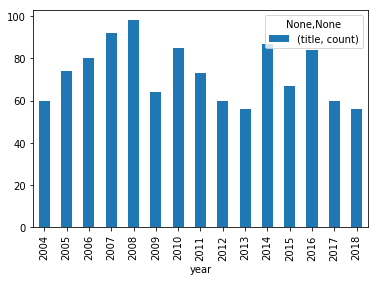

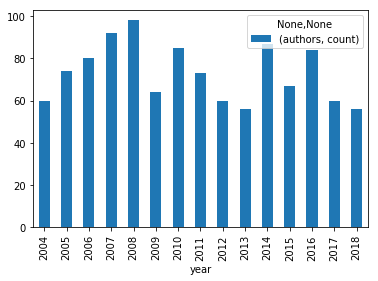

In [13]:
annee_publication = data[['year','title']].groupby(['year']).agg(['count'])
fig = annee_publication.plot.bar()
authors_productifs= data[['year','authors']].groupby(['year']).agg(['count'])
authors_productifs.plot.bar()

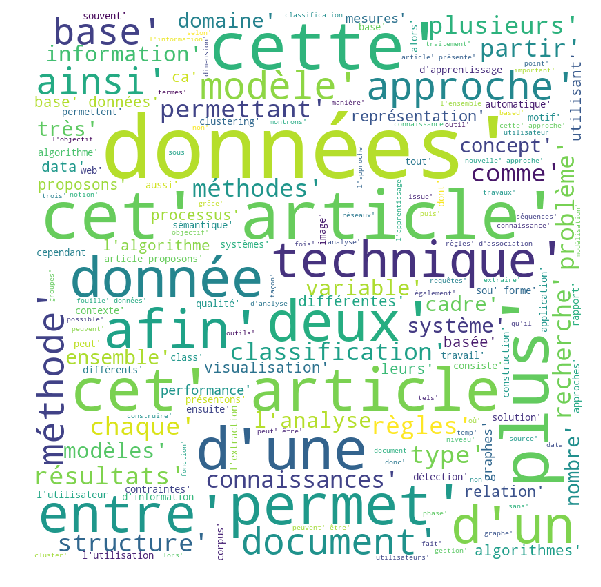

In [14]:

###
##Génération d'un nuage de mots
###
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in data.abstract:
    val = str(val) 
    tokens = val.split()
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Matrix Term-Document Titre Resum et matrices adja

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
docs_title =[" ".join(review) for review in data_abs_null['title'].values]
vec_title = CountVectorizer()
X_title = vec_title.fit_transform(docs_title)
mtd_title =pd.DataFrame(X_title.toarray(), columns =vec_title.get_feature_names())

TypeError: can only join an iterable

In [16]:
###
##Binarisation de la matrice term-doc titre
###
mtd_title[(mtd_title>0)]=1
###
##Création des matrices term-doc abstract
###

In [17]:
mtd_title.to_csv('mtd_title.csv')

In [20]:
docs_abstract =[" ".join(review) for review in data['abstract'].values]
vec_abs = CountVectorizer()
X_abstract =vec_abs.fit_transform(docs_abstract)
mtd_abstract = pd.DataFrame(X_abstract.toarray(), columns =vec_abs .get_feature_names())

In [23]:
docs_abstract = [" ".join(review) for review in data['abstract'].values]
vec_abstract = CountVectorizer()
X_abstract = vec_abstract.fit_transform(docs_abstract)
mtd_abstract = pd.DataFrame(X_abstract.toarray(), columns=vec_abstract.get_feature_names())
######### Binarisation
mtd_abstract[mtd_abstract>0]=1

In [24]:
matrix_co_titres = mtd_title.dot(mtd_title.transpose())
matrix_co_resume = mtd_abstract.dot(mtd_abstract.transpose())

In [25]:
type(matrix_co_titres)

pandas.core.frame.DataFrame

In [33]:
# On récupére la liste de tous les auteurs
authors =[]
for a in data.authors:
    authors= authors + a.split(",")

In [41]:
authors = set(authors)
print(len(authors))

2003


In [61]:
# On récupère une liste de tous les auteurs uniques présents dans le df
authors = []
for a in data.authors:
    authors = authors + a.split(", ")
print(len(authors))
authors = set(authors)
print(len(authors))


doc_authors = pd.DataFrame(0, index=np.arange(len(data)), columns=authors)
  
doc_authors.shape
data.authors.head(10)
# On parcourt chacune des lignes de data, on lit les auteurs et on va mettre un
#1 pour chacune des colonnes correspondant aux auteurs
for doc in range(len(data)):
    list_auteurs = data.authors.iloc[doc]
    list_auteur_sep = list_auteurs.split(", ")
    for a in list_auteur_sep:
        doc_authors.ix[doc,a ]=1


# Matrice co-auteurs
matrix_doc_authors = np.matrix(doc_authors)
matrix_co_auteurs = matrix_doc_authors.dot(matrix_doc_authors.transpose())
df_mat_co_auteurs = doc_authors.dot(doc_authors.transpose())

3248
1779


/usr/lib/python3/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [59]:
matrix_co_auteurs = np.matrix(doc_authors)
matrix_co_auteurs = doc_authors.dot(doc_authors.transpose())

In [70]:
matrix_doc_authors = np.matrix(doc_authors)
matrix_doc_authors
matrix_co_auteurs = matrix_doc_authors.dot(matrix_doc_authors.transpose())

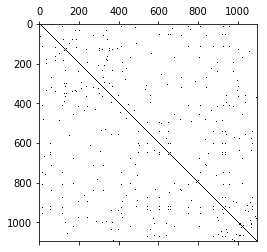

In [74]:
plt.spy(matrix_co_auteurs)
plt.show()

In [75]:
import community
import networkx as nx
from random import choice
import Cluster_Ensembles as CE
g_co_auteurs = nx.from_numpy_matrix(matrix_co_auteurs)

In [77]:
# Détection de communauté : application de l'algo de louvain
g_co_auteurs = nx.from_numpy_matrix(matrix_co_auteurs)
partition = community.best_partition(g_co_auteurs)
print("partition ", partition)

partition  {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 1, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 14, 18: 16, 19: 17, 20: 18, 21: 19, 22: 3, 23: 20, 24: 21, 25: 6, 26: 7, 27: 22, 28: 23, 29: 8, 30: 15, 31: 24, 32: 25, 33: 0, 34: 23, 35: 21, 36: 26, 37: 21, 38: 7, 39: 27, 40: 28, 41: 27, 42: 1, 43: 29, 44: 30, 45: 31, 46: 25, 47: 32, 48: 33, 49: 34, 50: 1, 51: 35, 52: 36, 53: 37, 54: 0, 55: 21, 56: 38, 57: 15, 58: 39, 59: 1, 60: 1, 61: 3, 62: 40, 63: 41, 64: 42, 65: 43, 66: 6, 67: 6, 68: 44, 69: 1, 70: 45, 71: 28, 72: 46, 73: 40, 74: 16, 75: 24, 76: 7, 77: 7, 78: 38, 79: 28, 80: 47, 81: 48, 82: 27, 83: 49, 84: 12, 85: 49, 86: 27, 87: 50, 88: 51, 89: 45, 90: 25, 91: 21, 92: 24, 93: 20, 94: 27, 95: 52, 96: 16, 97: 3, 98: 15, 99: 1, 100: 27, 101: 26, 102: 49, 103: 7, 104: 1, 105: 53, 106: 2, 107: 53, 108: 16, 109: 54, 110: 44, 111: 55, 112: 56, 113: 3, 114: 0, 115: 57, 116: 29, 117: 58, 118: 14, 119: 1, 120: 59, 121: 3, 122: 1, 123: 27, 124: 27, 125: 18, 12

In [78]:
modularity_value = community.modularity(partition, g_co_auteurs)
print("modularity_value", modularity_value)

modularity_value 0.9133746924382848


In [79]:
#Visualisation du nombre de communauté retouvé
vect_label = set(partition.values())
print("vect_label",vect_label)

vect_label {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [80]:
size = int(len((set(partition.values()))))
print("size", size)

size 264


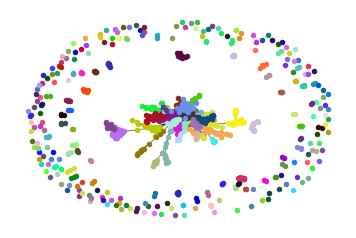

In [82]:
#générer un vecteur de couleurs = au nb de communauté
colors = ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)]
#Affichage du graphe
pos = nx.spring_layout(g_co_auteurs)
count = 0
for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes]== com]
    nx.draw_networkx_nodes(g_co_auteurs, pos, list_nodes, node_size = 20, node_color =(colors[count]))
    count += 1
nx.draw_networkx_edges(g_co_auteurs, pos, alpha = 0.5)
plt.axis("off")
plt.show()

In [83]:
# Réorganisation de la matrice 
def reorder(X, partition):
    """
        return reordered rows and columns of X with respect to partition
    """
    sort_partition = partition.argsort()

    reordered_X = X[:, sort_partition]
    reordered_X = reordered_X[sort_partition, :]
    
    return reordered_X

In [84]:
vect_partition = np.array(list(partition.values()))

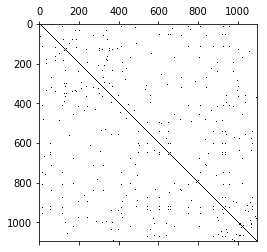

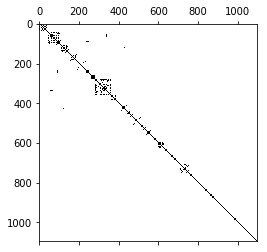

In [85]:
plt.spy(matrix_co_auteurs)
plt.show()
reordered_matrix_co_auteurs = reorder(matrix_co_auteurs, vect_partition)
# Affichage de la matrice réordonnée
plt.spy(reordered_matrix_co_auteurs)
plt.show()

In [88]:
matrix_co_titres = np.matrix(matrix_co_titres)
g_co_titres = nx.from_numpy_matrix(matrix_co_titres)
# Détection de communauté : application de l'algo de louvain
partition_titres = community.best_partition(g_co_titres)
print("partition_titres ", partition_titres)

partition_titres  {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 24, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 24, 64: 62, 65: 63, 66: 64, 67: 65, 68: 66, 69: 59, 70: 67, 71: 68, 72: 69, 73: 70, 74: 71, 75: 72, 76: 73, 77: 74, 78: 75, 79: 76, 80: 77, 81: 78, 82: 79, 83: 80, 84: 81, 85: 82, 86: 83, 87: 84, 88: 24, 89: 85, 90: 86, 91: 87, 92: 88, 93: 89, 94: 90, 95: 91, 96: 92, 97: 93, 98: 94, 99: 95, 100: 96, 101: 97, 102: 98, 103: 99, 104: 6, 105: 100, 106: 101, 107: 102, 108: 103, 109: 104, 110: 105, 111: 106, 112: 107, 113: 108, 114: 109, 115: 110, 116: 111, 117: 112, 118: 113, 119: 114, 120: 11

In [89]:
#Calcul de la modularité liée a cette partition
modularity_value_titres = community.modularity(partition_titres, g_co_auteurs)
print("modularity_value_titres", modularity_value_titres)

modularity_value_titres 0.3673711214316687


In [90]:
#Visualisation du nombre de communauté retouvé
vect_label_titres = set(partition_titres.values())
print("vect_label_titres",vect_label_titres)
size_titres = int(len((set(partition_titres.values()))))
print("size titre", size_titres)

vect_label_titres {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

In [91]:
#générer un vecteur de couleurs = au nb de communauté
colors = ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size_titres)]

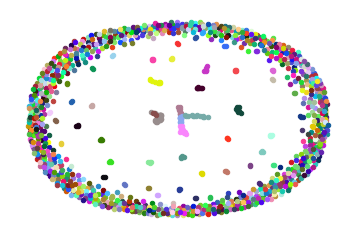

In [92]:
#Affichage du graphe
pos = nx.spring_layout(g_co_titres)
count = 0
for com in set(partition_titres.values()):
    list_nodes = [nodes for nodes in partition_titres.keys() if partition_titres[nodes]== com]
    nx.draw_networkx_nodes(g_co_titres, pos, list_nodes, node_size = 20, node_color =(colors[count]))
    count += 1
nx.draw_networkx_edges(g_co_titres, pos, alpha = 0.5)
plt.axis("off")
plt.show()

In [93]:
vect_partition_titres = np.array(list(partition_titres.values()))

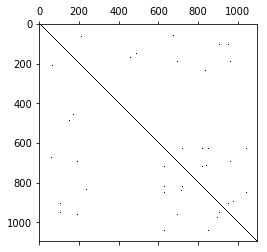

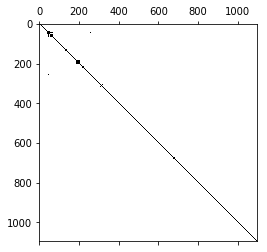

In [94]:
plt.spy(matrix_co_titres)
plt.show()
reordered_matrix_co_titres = reorder(matrix_co_titres, vect_partition_titres)
# Affichage de la matrice réordonnée
plt.spy(reordered_matrix_co_titres)
plt.show()

In [95]:
matrix_co_resume = np.matrix(matrix_co_resume)

In [96]:
# creation du graphe avec networkx
g_co_resume = nx.from_numpy_matrix(matrix_co_resume)

In [97]:
# Détection de communauté : application de l'algo de louvain
partition_resume = community.best_partition(g_co_resume)
print("partition_resume ", partition_resume)

partition_resume  {0: 0, 1: 1, 2: 0, 3: 1, 4: 2, 5: 0, 6: 1, 7: 1, 8: 0, 9: 1, 10: 1, 11: 2, 12: 2, 13: 2, 14: 0, 15: 0, 16: 2, 17: 2, 18: 2, 19: 0, 20: 0, 21: 2, 22: 0, 23: 2, 24: 0, 25: 2, 26: 2, 27: 2, 28: 0, 29: 2, 30: 0, 31: 2, 32: 1, 33: 2, 34: 1, 35: 0, 36: 2, 37: 0, 38: 0, 39: 2, 40: 1, 41: 3, 42: 0, 43: 0, 44: 0, 45: 1, 46: 0, 47: 2, 48: 0, 49: 0, 50: 0, 51: 2, 52: 1, 53: 0, 54: 0, 55: 0, 56: 0, 57: 2, 58: 0, 59: 2, 60: 1, 61: 2, 62: 2, 63: 2, 64: 3, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 2, 71: 0, 72: 4, 73: 0, 74: 2, 75: 0, 76: 0, 77: 2, 78: 2, 79: 0, 80: 0, 81: 0, 82: 2, 83: 2, 84: 0, 85: 0, 86: 1, 87: 4, 88: 2, 89: 0, 90: 0, 91: 2, 92: 0, 93: 2, 94: 3, 95: 0, 96: 0, 97: 2, 98: 2, 99: 1, 100: 1, 101: 0, 102: 2, 103: 2, 104: 1, 105: 0, 106: 0, 107: 0, 108: 2, 109: 0, 110: 1, 111: 1, 112: 0, 113: 0, 114: 1, 115: 4, 116: 2, 117: 0, 118: 4, 119: 0, 120: 2, 121: 2, 122: 4, 123: 4, 124: 4, 125: 2, 126: 4, 127: 2, 128: 1, 129: 2, 130: 4, 131: 0, 132: 2, 133: 4, 134: 2, 135: 0, 136

In [98]:
#Calcul de la modularité liée a cette partition
modularity_value_resume = community.modularity(partition_resume, g_co_auteurs)
print("modularity_value_resume", modularity_value_resume)

modularity_value_resume 0.34764386340532966


In [99]:
#Visualisation du nombre de communauté retouvé
vect_label_resume = set(partition_resume.values())
print("vect_label_resume",vect_label_resume)
size_resume = int(len((set(partition_resume.values()))))
print("size resume", size_resume)

vect_label_resume {0, 1, 2, 3, 4}
size resume 5


In [100]:
#générer un vecteur de couleurs = au nb de communauté
colors = ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size_resume)]

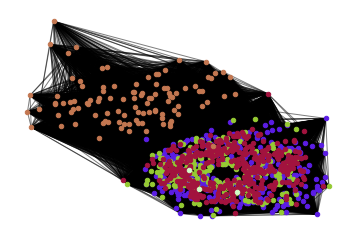

In [101]:
#Affichage du graphe
pos = nx.spring_layout(g_co_resume)
count = 0
for com in set(partition_resume.values()):
    list_nodes = [nodes for nodes in partition_resume.keys() if partition_resume[nodes]== com]
    nx.draw_networkx_nodes(g_co_resume, pos, list_nodes, node_size = 20, node_color =(colors[count]))
    count += 1
nx.draw_networkx_edges(g_co_resume, pos, alpha = 0.5)
plt.axis("off")
plt.show()

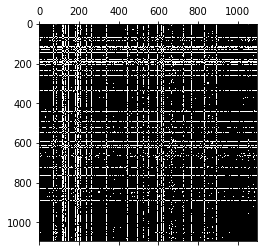

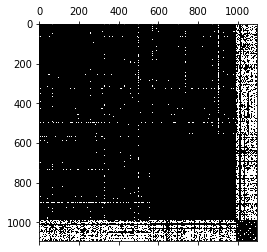

In [102]:
vect_partition_resume = np.array(list(partition_resume.values()))
plt.spy(matrix_co_resume)
plt.show()
reordered_matrix_co_resume = reorder(matrix_co_resume, vect_partition_resume)
# Affichage de la matrice réordonnée
plt.spy(reordered_matrix_co_resume)
plt.show()

In [103]:
import Cluster_Ensembles as CE
import community
import networkx

In [104]:
clustering_1 = vect_partition
clustering_2 = vect_partition_titres
clustering_3 = vect_partition_resume
cluster_runs = np.array([clustering_1,clustering_2,clustering_3])
print("cluster_runs", cluster_runs)
consensus_clustering_labels = CE.cluster_ensembles(cluster_runs, verbose=True, N_clusters_max=12)
print("consensus_clustering_labels", consensus_clustering_labels)

cluster_runs [[  0   1   2 ...  18  53 263]
 [  0   1   2 ... 904 905 906]
 [  0   1   0 ...   0   2   2]]
*****
INFO: Cluster_Ensembles: CSPA: consensus clustering using CSPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_CSPA.
#

#
INFO: Cluster_Ensembles: sgraph: calling gpmetis for graph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_CSPA.part.12
#

INFO: Cluster_Ensembles: cluster_ensembles: CSPA at 0.5534336890499024.
*****

*****
INFO: Cluster_Ensembles: HGPA: consensus clustering using HGPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_HGPA.
INFO: Cluster_Ensembles: wgraph: 1096 vertices and 1176 non-zero hyper-edges.
#

#
INFO: Cluster_Ensembles: sgraph: calling shmetis for hypergraph partitioning.


/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_HGPA.part.12
#

INFO: Cluster_Ensembles: cluster_ensembles: HGPA at 0.39515027403210023.
*****

*****
INFO: Cluster_Ensembles: MCLA: consensus clustering using MCLA.
INFO: Cluster_Ensembles: MCLA: preparing graph for meta-clustering.
INFO: Cluster_Ensembles: MCLA: done filling hypergraph adjacency matrix. Starting computation of Jaccard similarity matrix.
INFO: Cluster_Ensembles: MCLA: starting computation of Jaccard similarity matrix.


/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


INFO: Cluster_Ensembles: MCLA: done computing the matrix of pairwise Jaccard similarity scores.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_MCLA.
#

#
INFO: Cluster_Ensembles: sgraph: calling gpmetis for graph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_MCLA.part.12
#
INFO: Cluster_Ensembles: MCLA: delivering 12 clusters.
INFO: Cluster_Ensembles: MCLA: average posterior probability is 0.019553193732156783

INFO: Cluster_Ensembles: cluster_ensembles: MCLA at 0.5358171806531321.
*****
consensus_clustering_labels [1 7 1 ... 0 9 8]


/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [130]:
len(np.unique(consensus_clustering_labels))

12

In [131]:
mtd_title =pd.read_csv("mtd_title.csv", index_col=0)
td_abstract =pd.read_csv("mtd_abstract.csv", index_col=0)#
mtd_authors =pd.read_csv("matrice_documents_auteurs.csv", index_col=0)# 

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


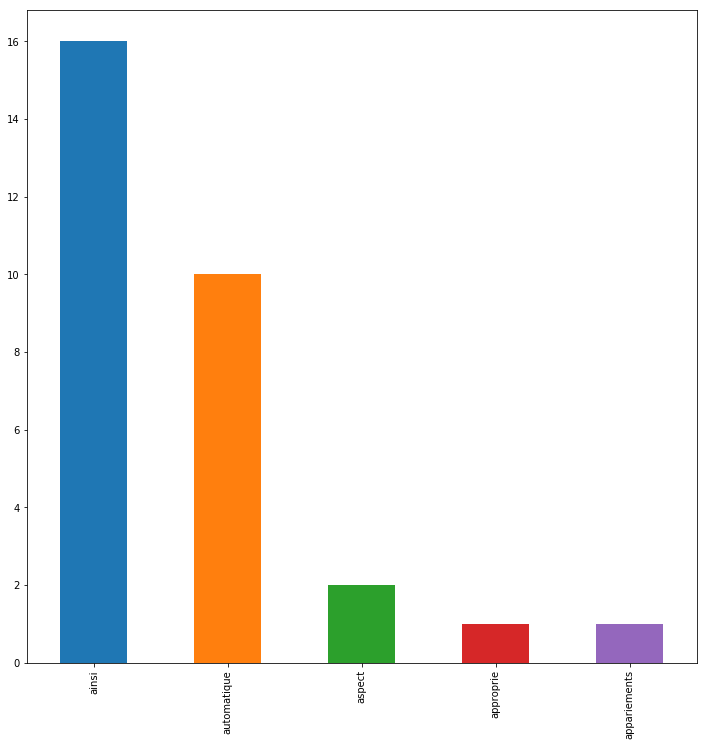

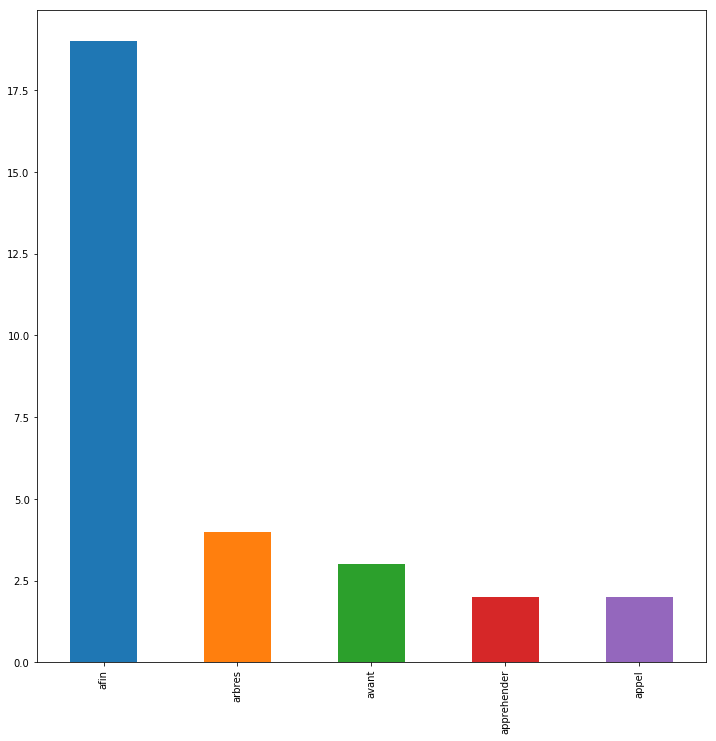

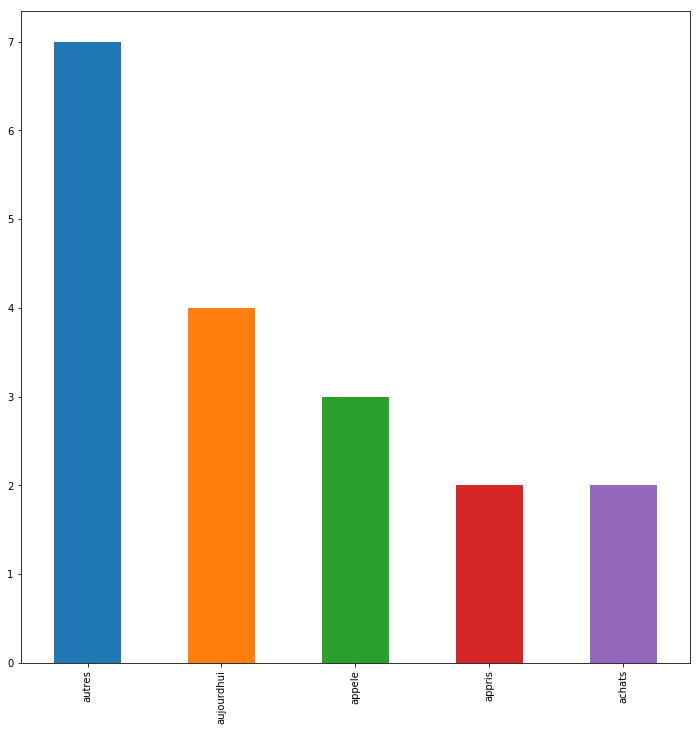

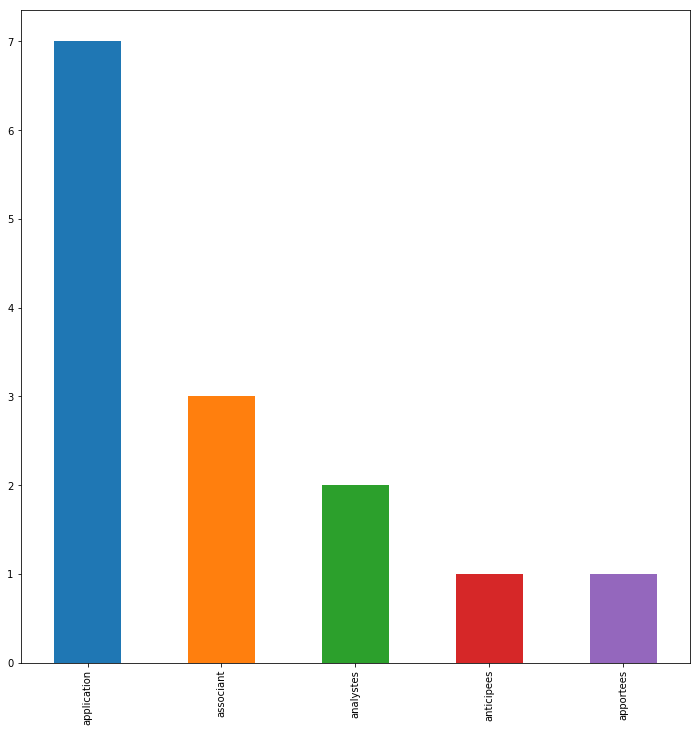

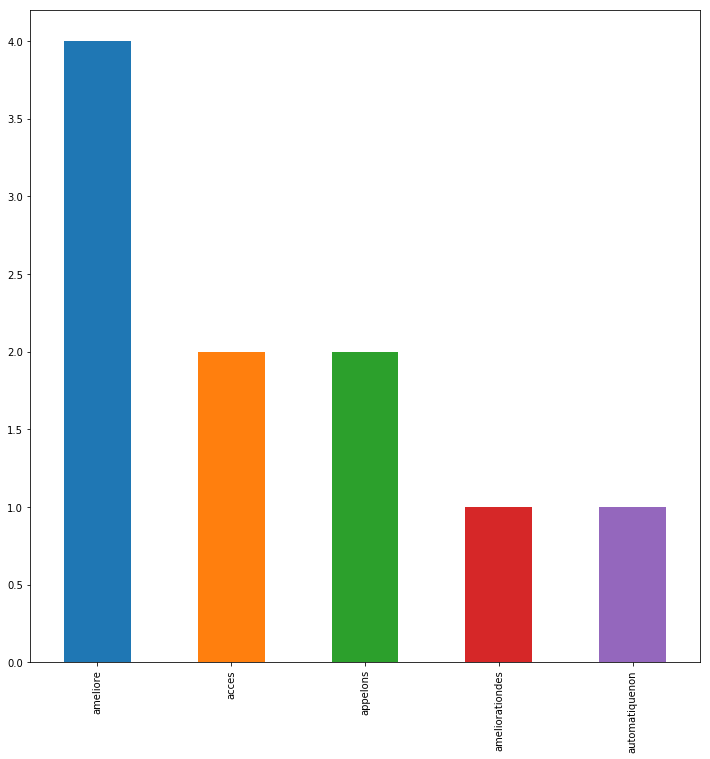

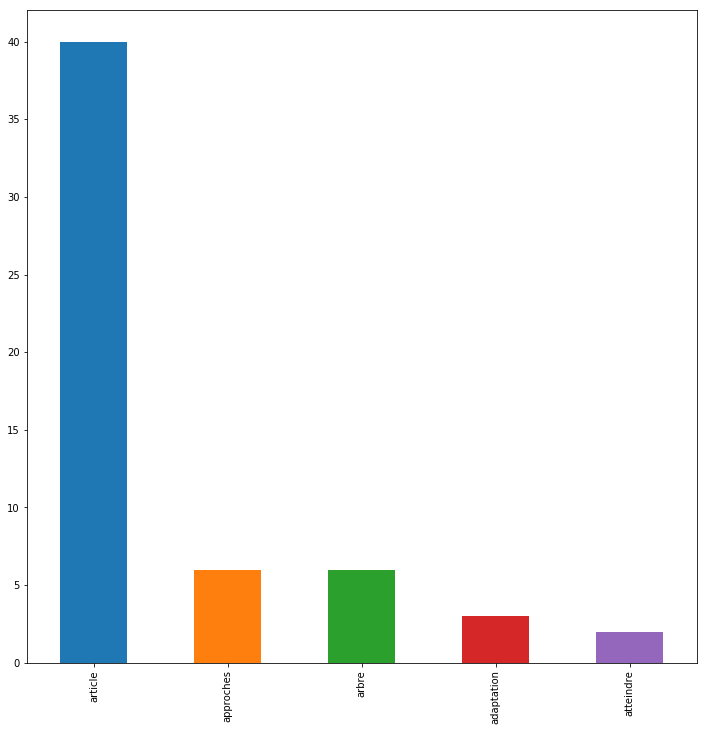

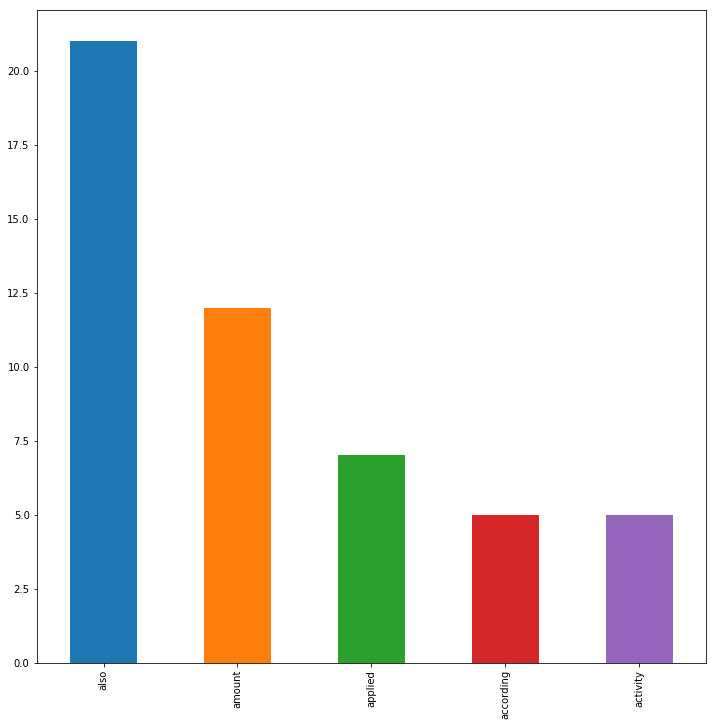

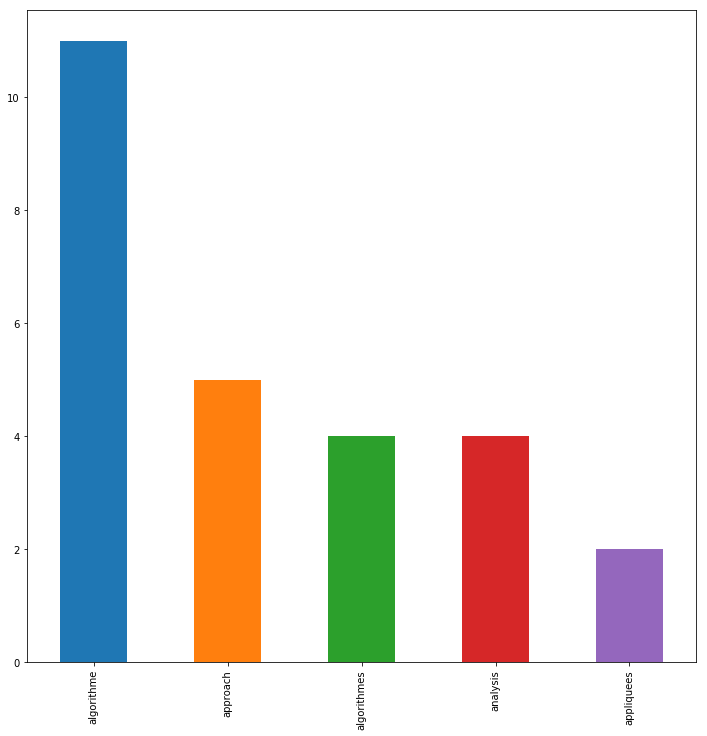

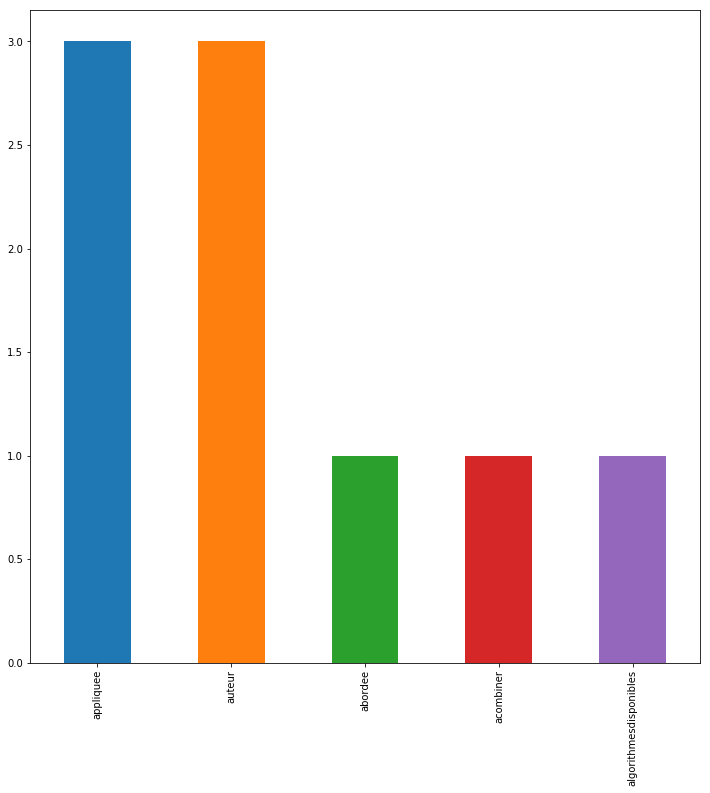

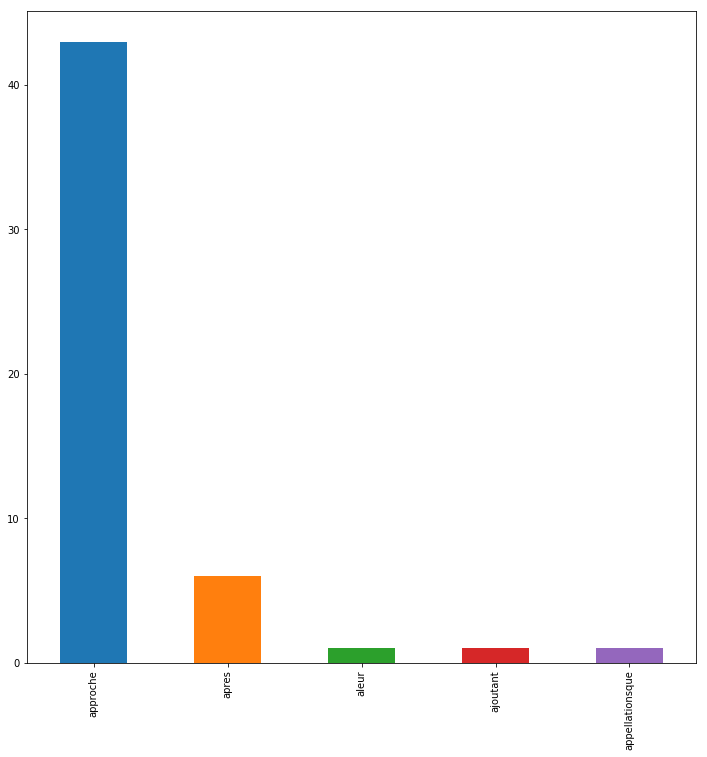

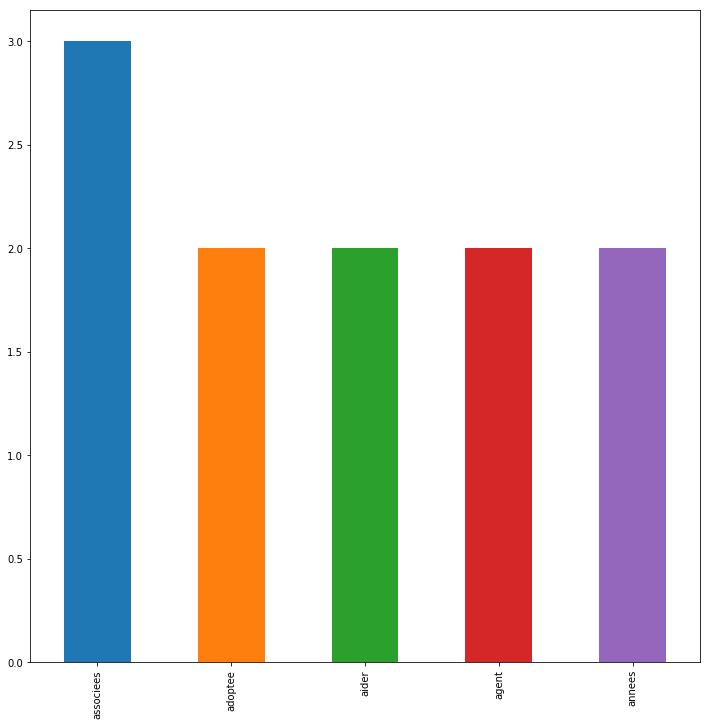

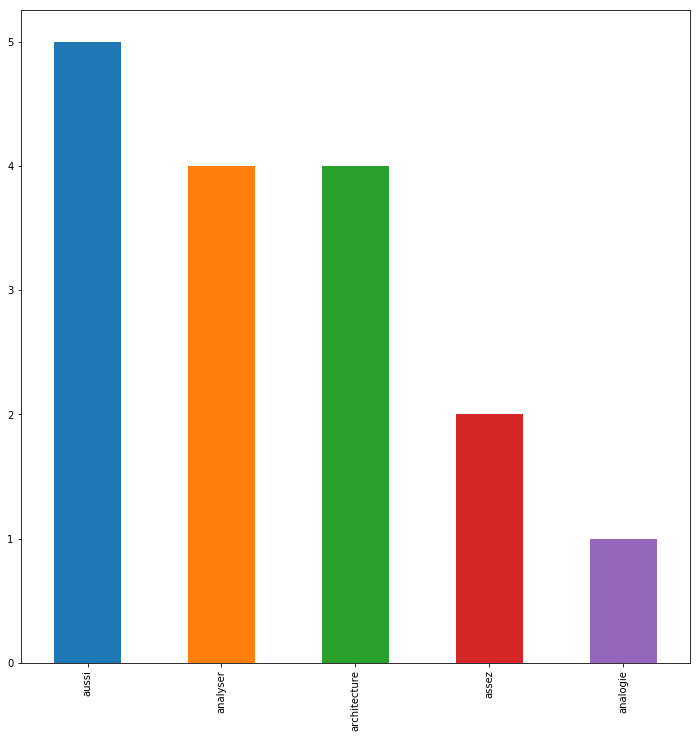

In [137]:
for c in set(consensus_clustering_labels):
    plt.figure()
    index_doc_com = np.arange(len(consensus_clustering_labels))[consensus_clustering_labels==c]
    sub_Td = td_abstract.iloc[index_doc_com, : ]
    sub_Td = sub_Td.iloc[:, index_doc_com]
    com_vect = np.sum(sub_Td, 0)
    com_vect_sorted_abs = com_vect.sort_values(ascending=False)[:5].plot.bar(figsize=(12,12))

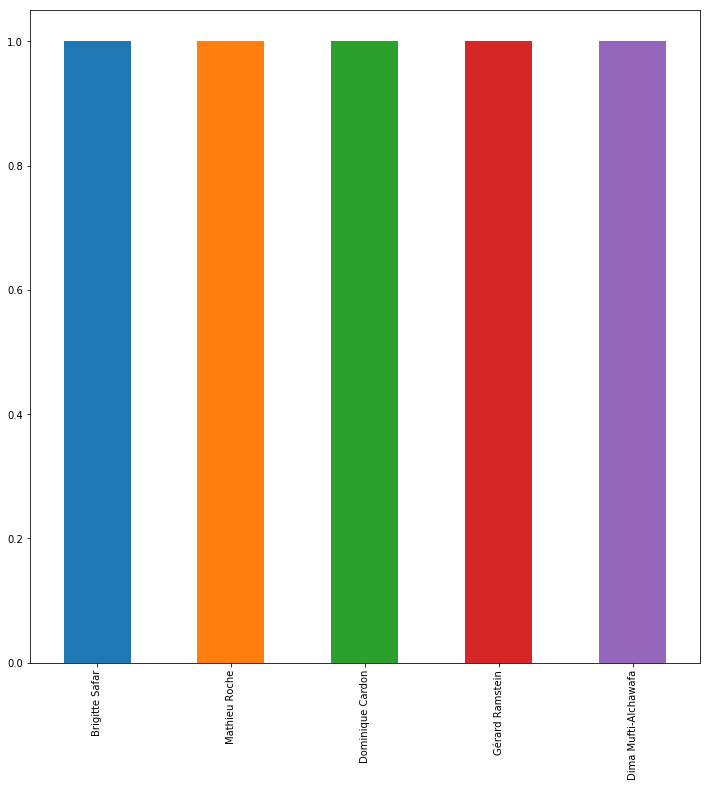

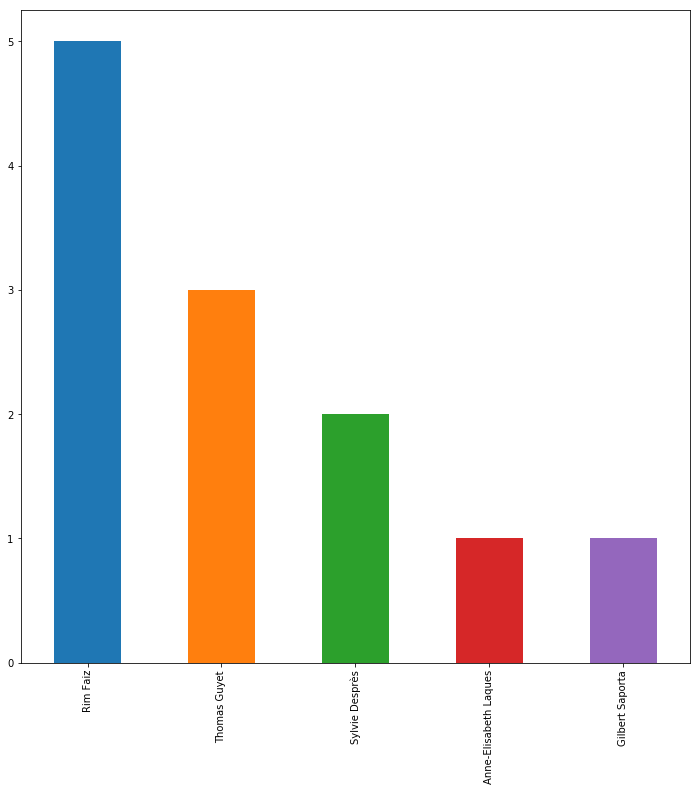

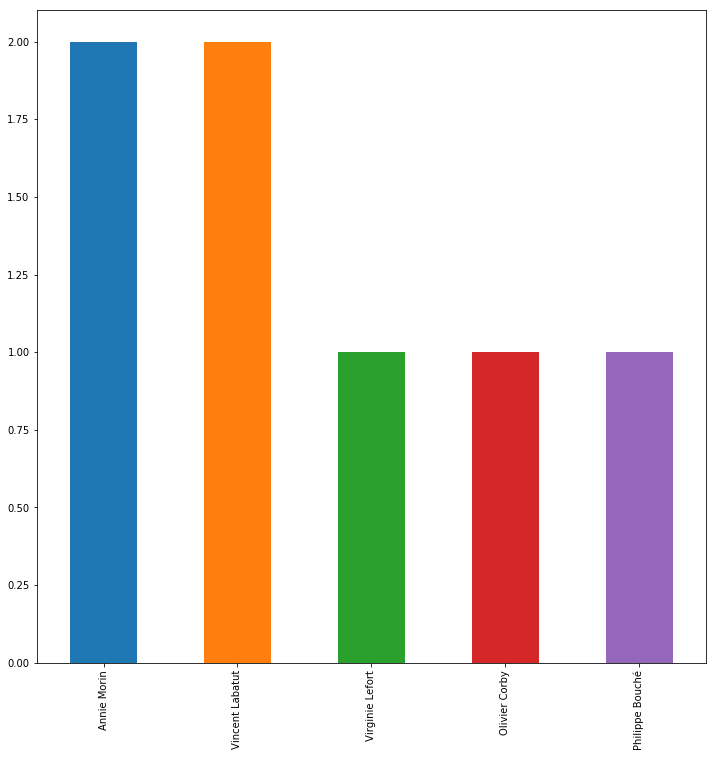

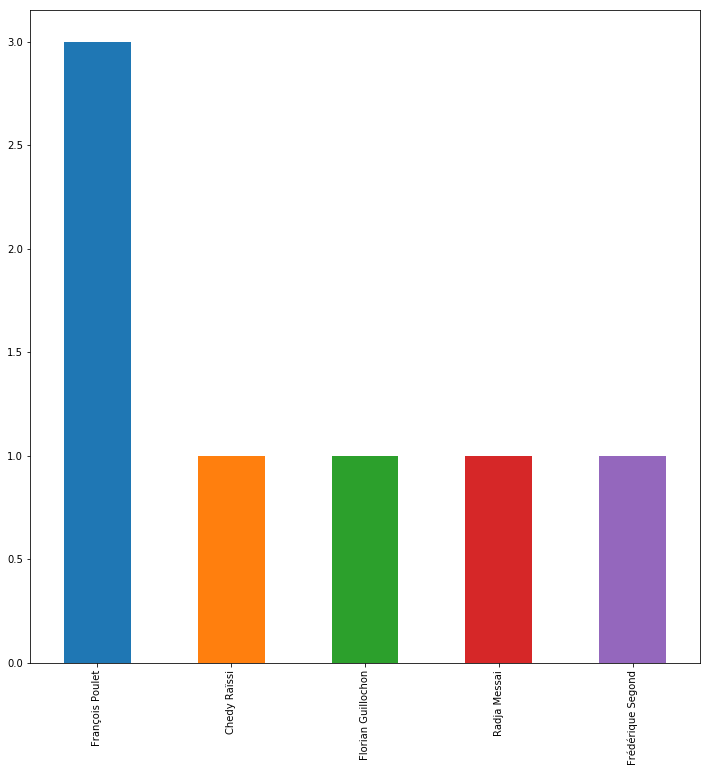

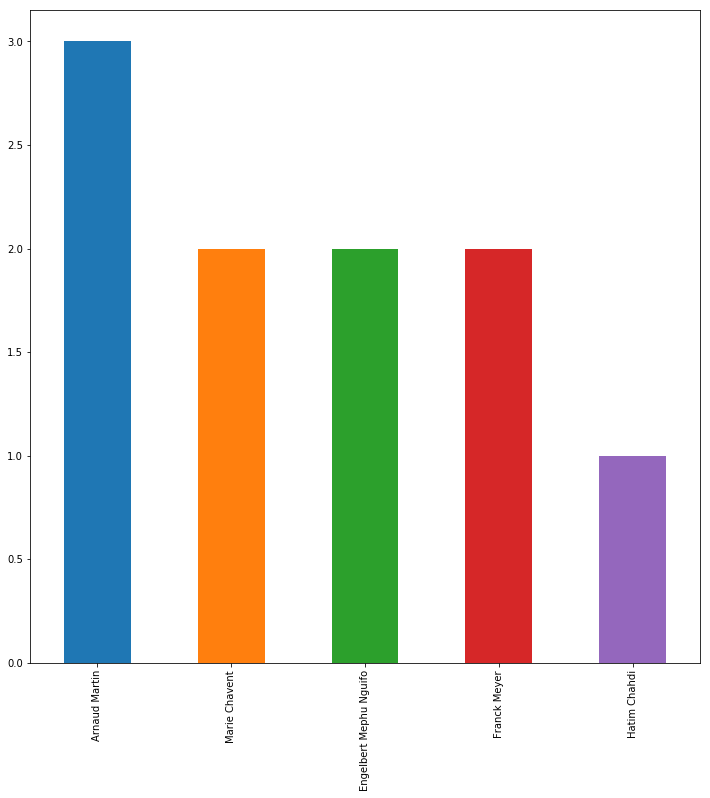

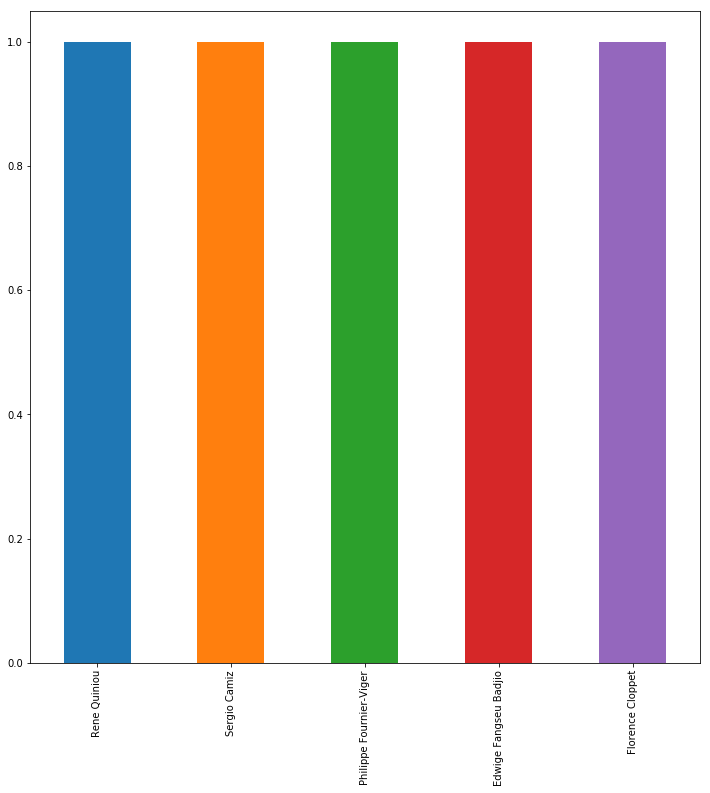

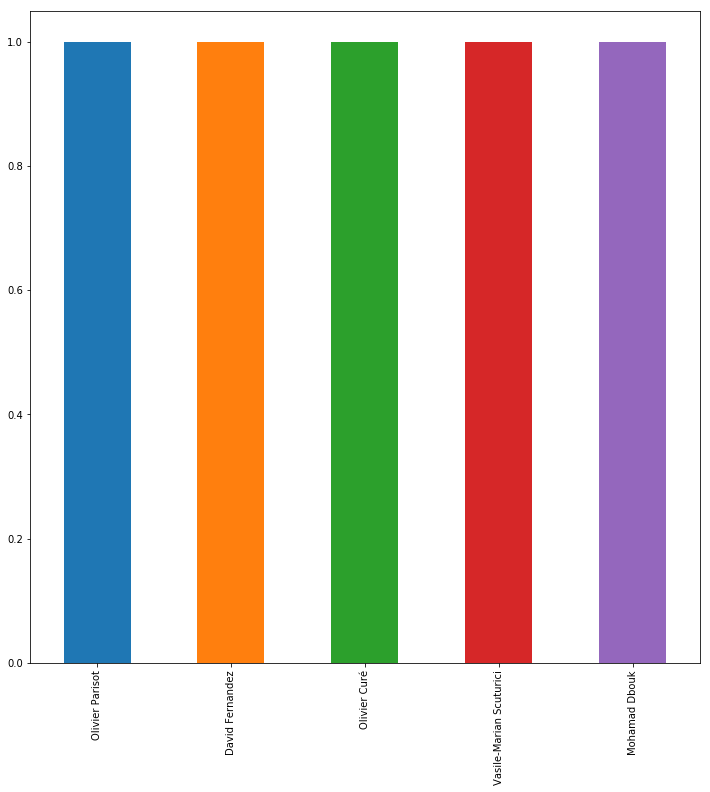

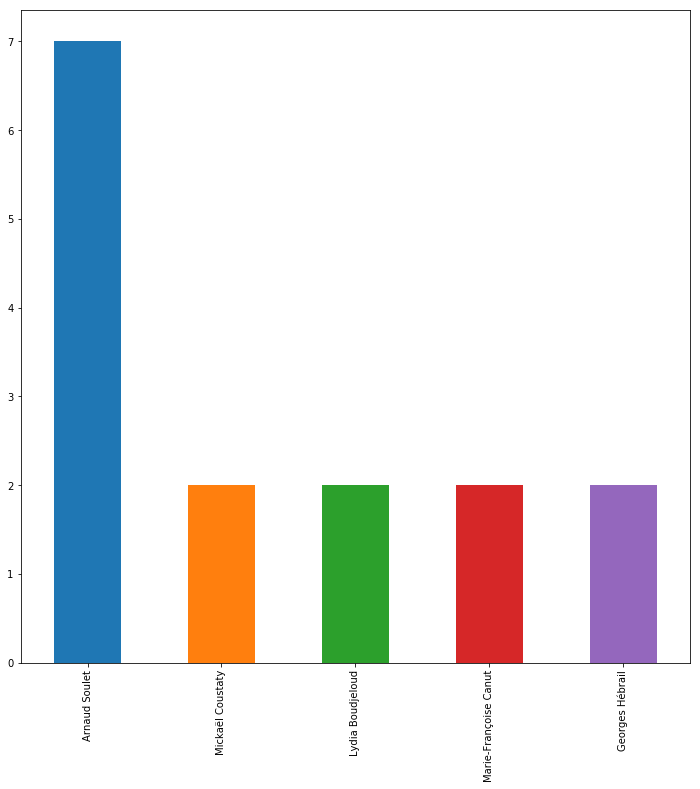

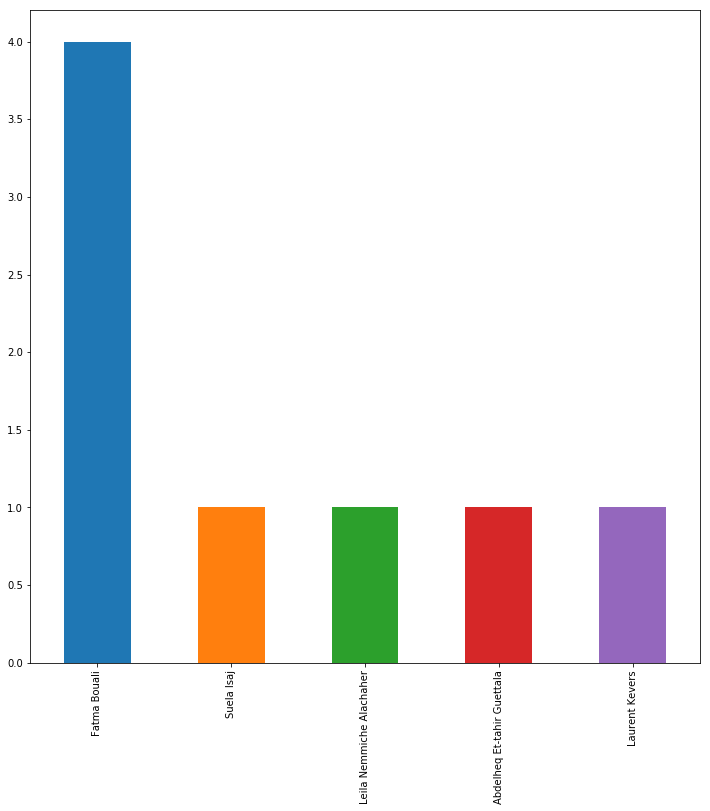

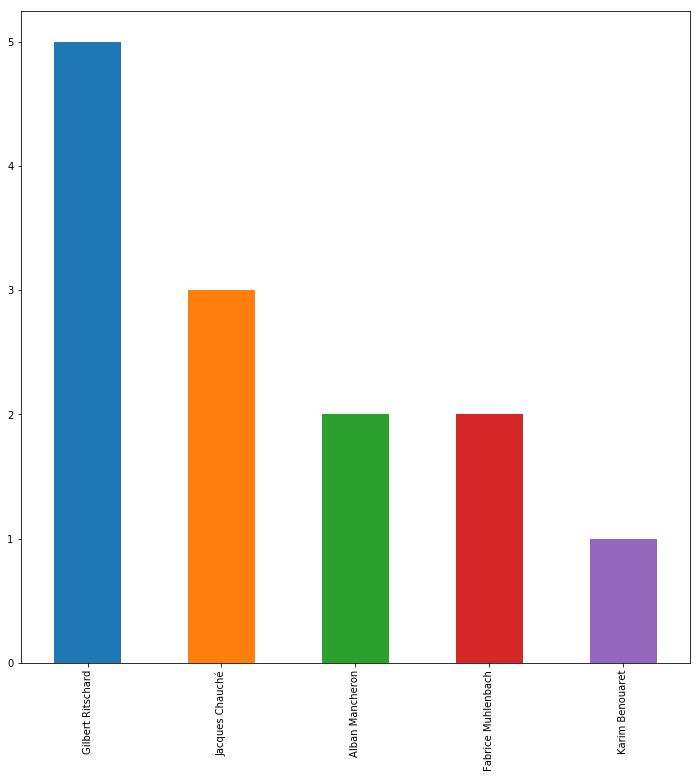

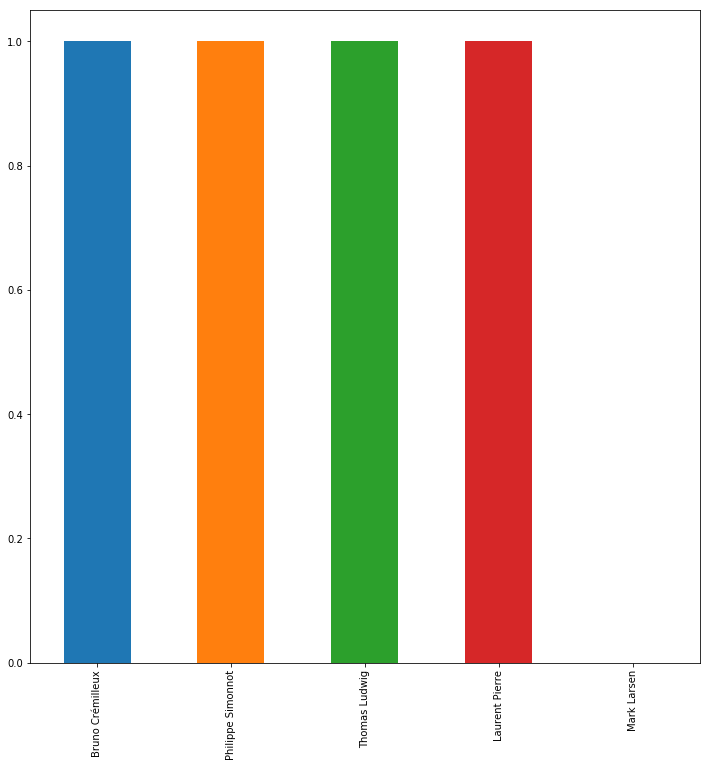

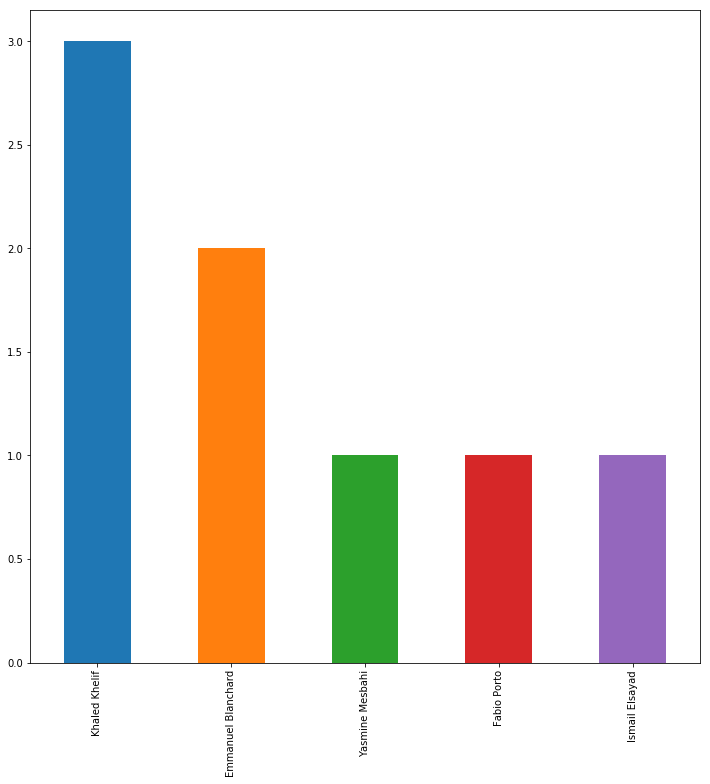

In [144]:
all_com_authors = []
for c in set(consensus_clustering_labels):
    plt.figure()
    index_doc_com = np.arange(len(consensus_clustering_labels))[consensus_clustering_labels==c]
    sub_Td = mtd_authors.iloc[index_doc_com, : ]
    sub_Td = sub_Td.iloc[:, index_doc_com]
    com_vect = np.sum(sub_Td, 0)
    com_vect_sorted_authours = com_vect.sort_values(ascending=False)[:5].plot.bar(figsize=(12,12))
    all_com_authors.append(np.array(com_vect_sorted_authours))

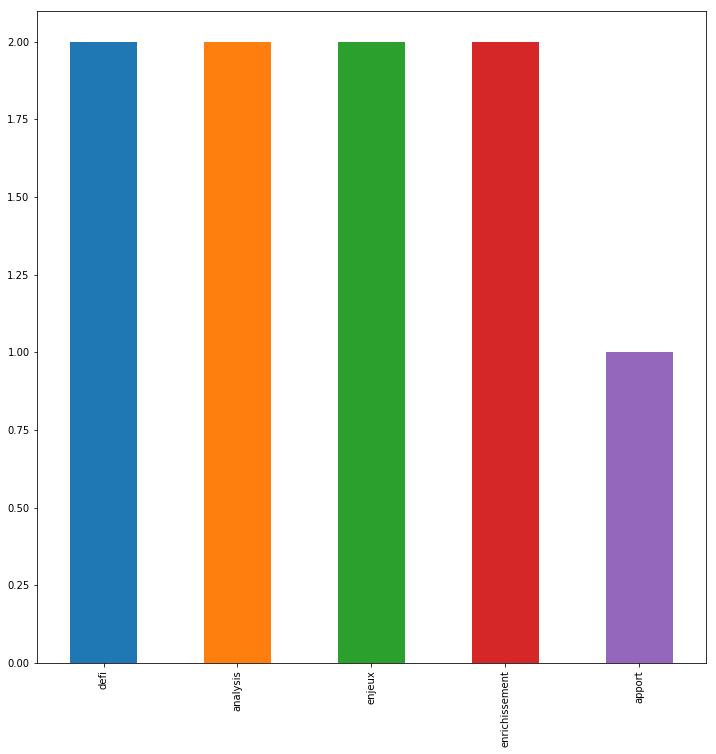

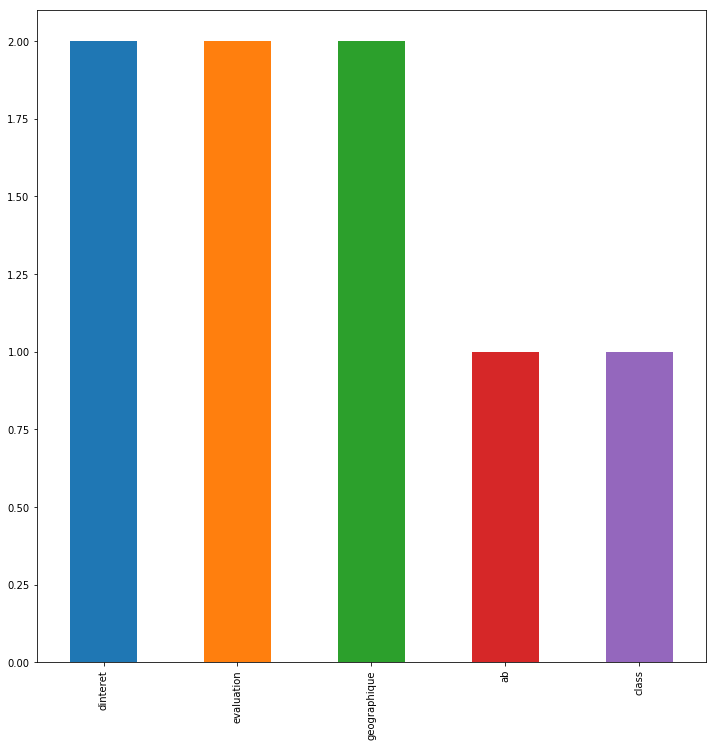

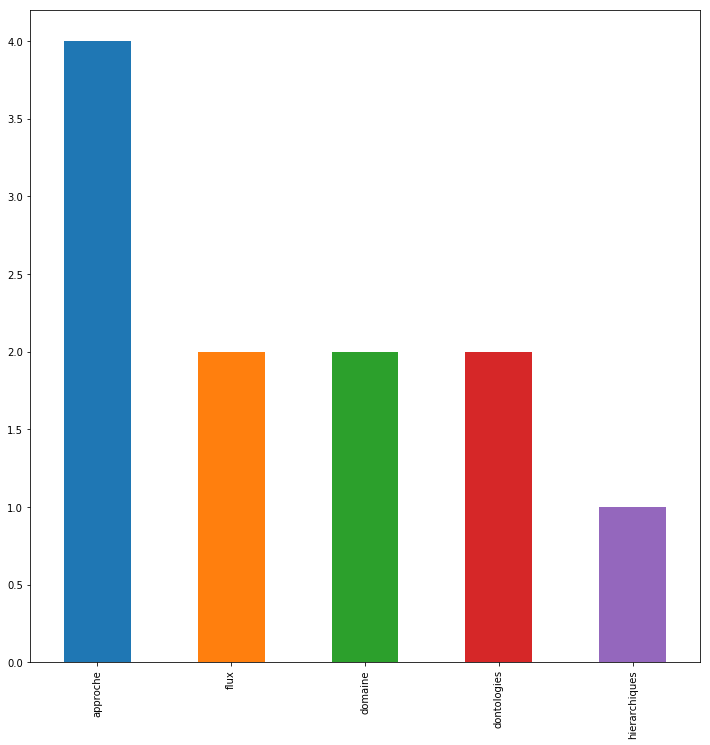

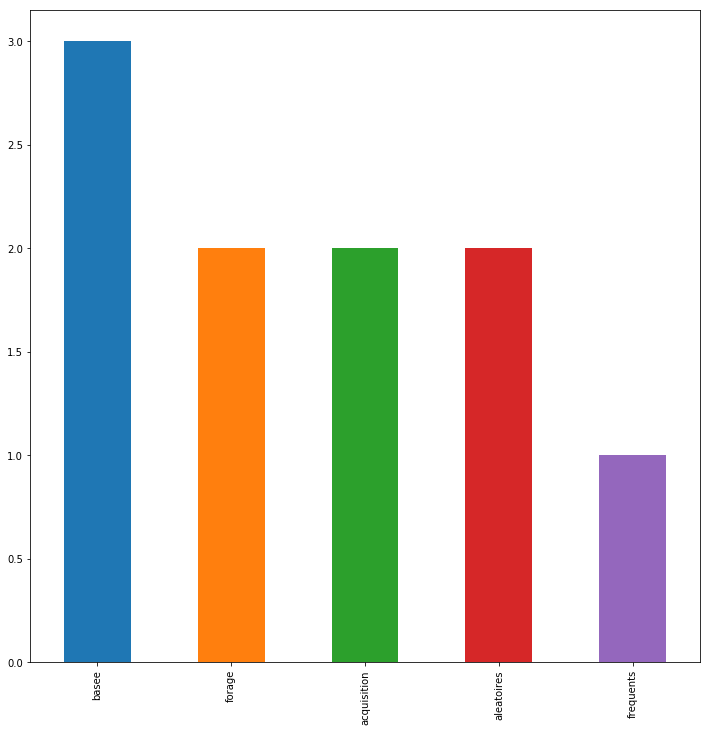

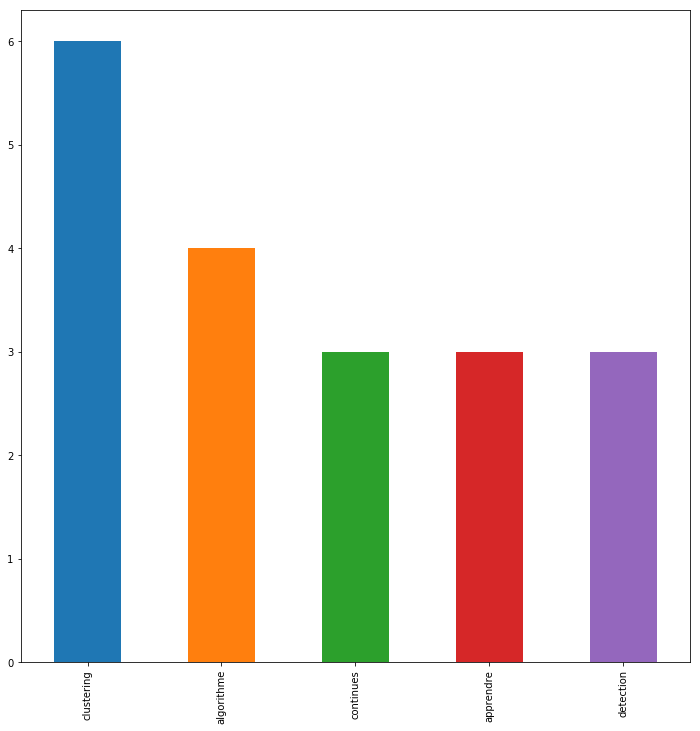

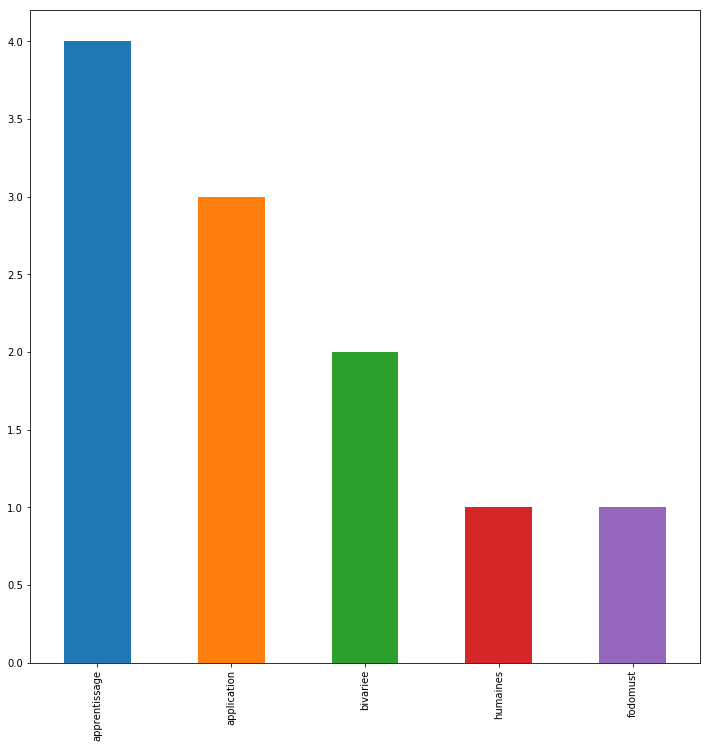

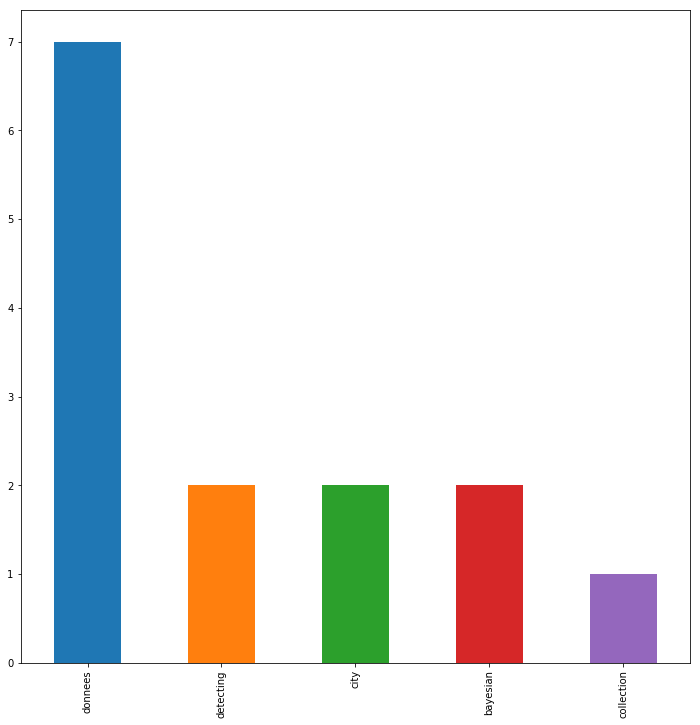

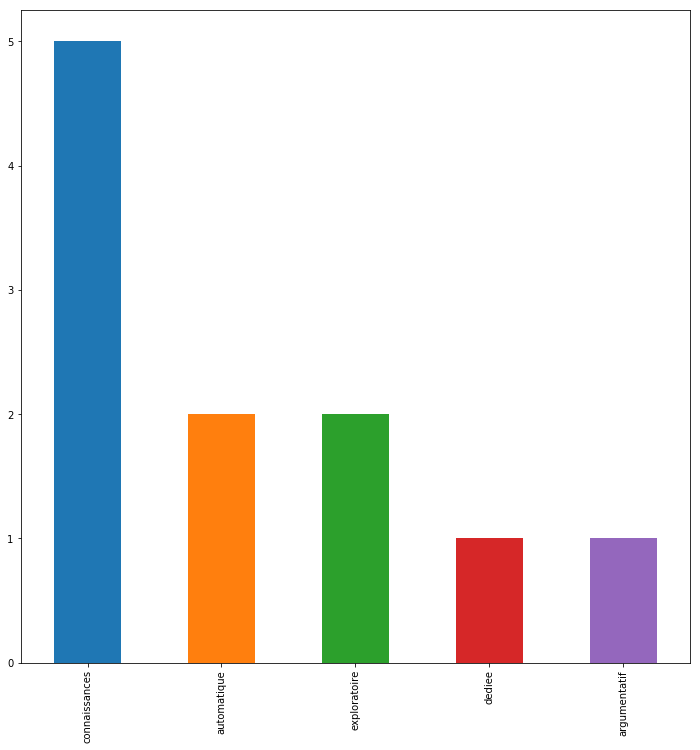

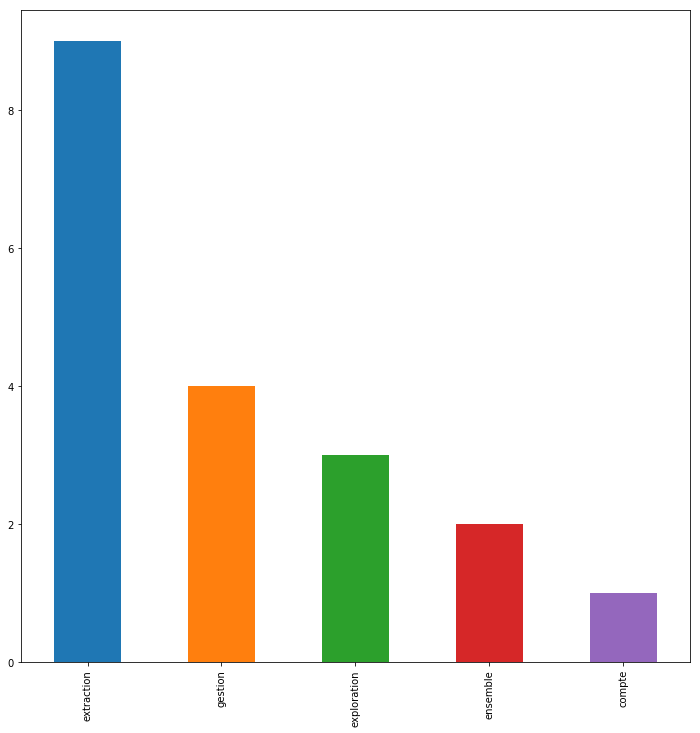

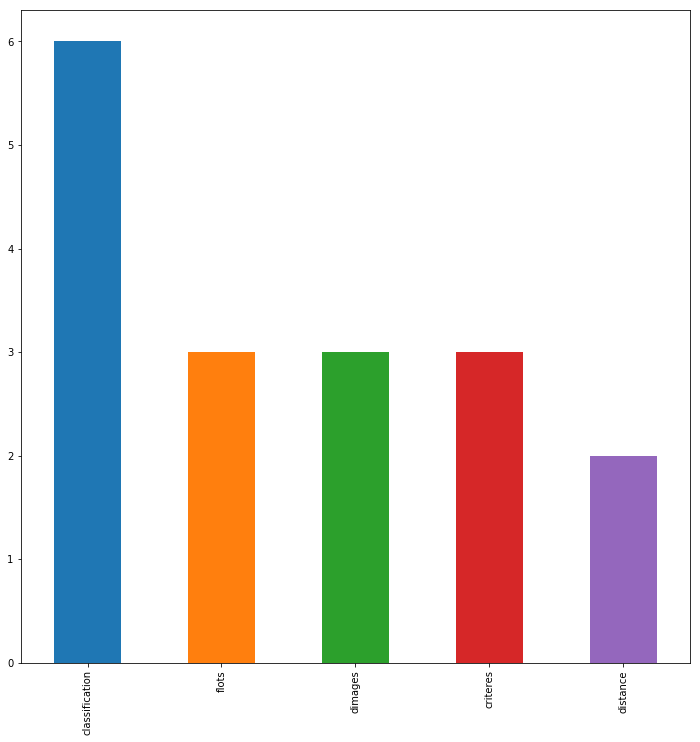

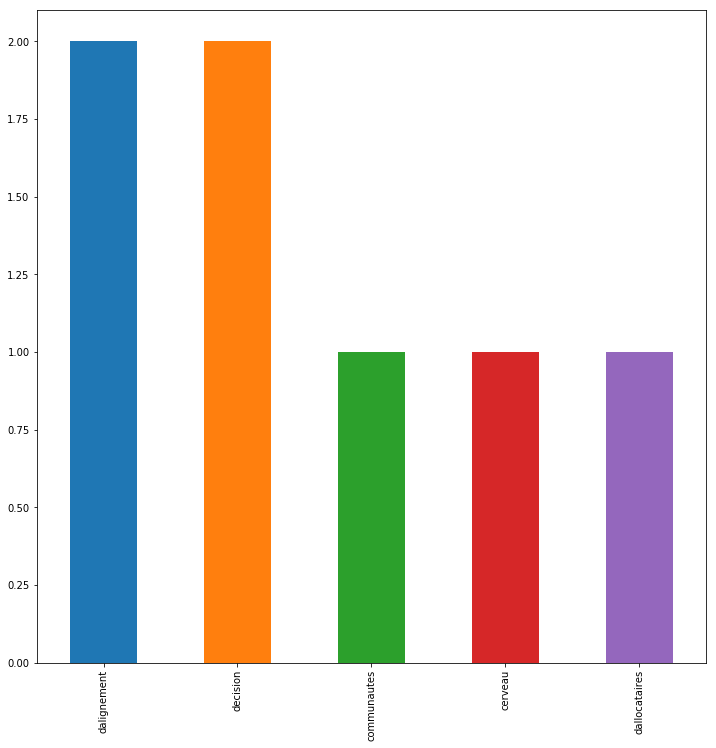

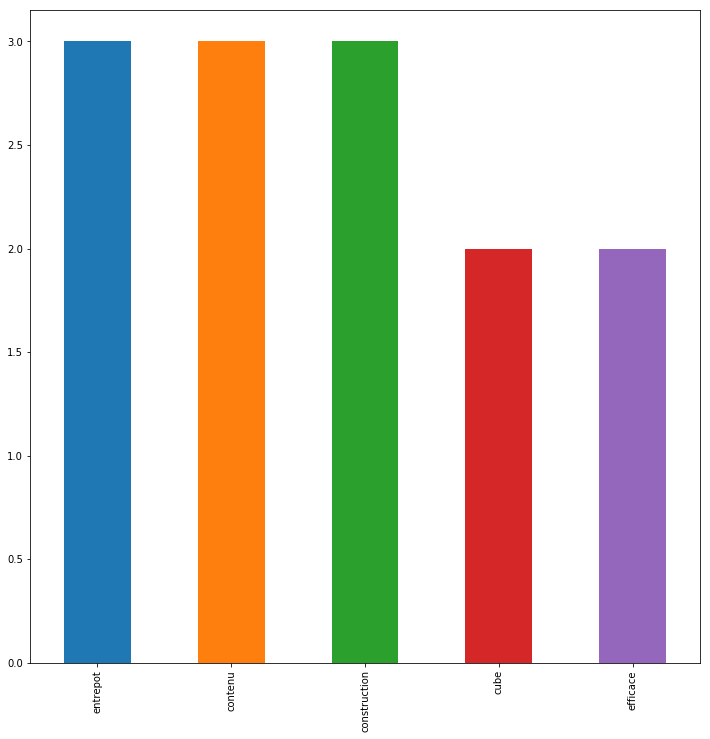

In [140]:
for c in set(consensus_clustering_labels):
    plt.figure()
    index_doc_com = np.arange(len(consensus_clustering_labels))[consensus_clustering_labels==c]
    sub_Td = mtd_title.iloc[index_doc_com, : ]
    sub_Td = sub_Td.iloc[:, index_doc_com]
    com_vect = np.sum(sub_Td, 0)
    com_vect_sorted_title= com_vect.sort_values(ascending=False)[:5].plot.bar(figsize=(12,12))

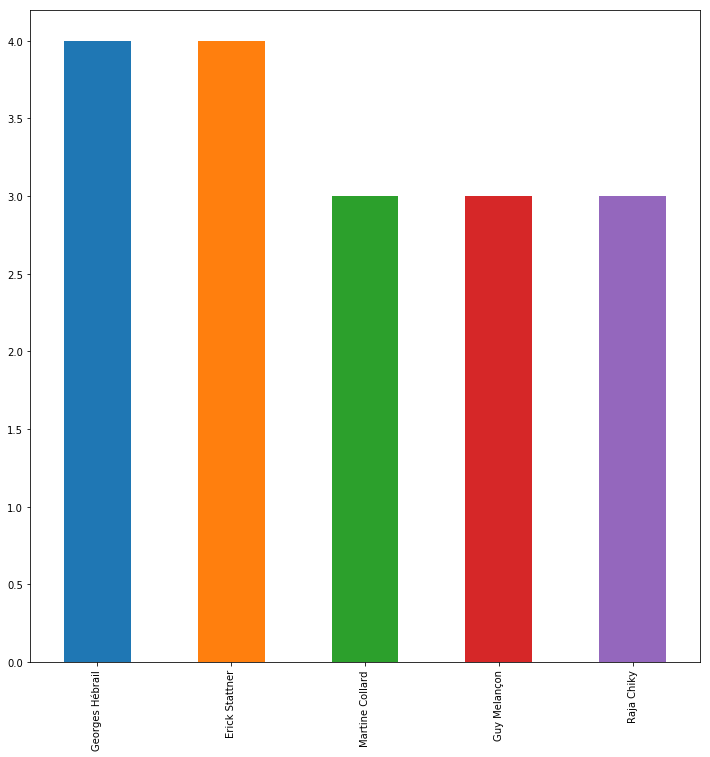

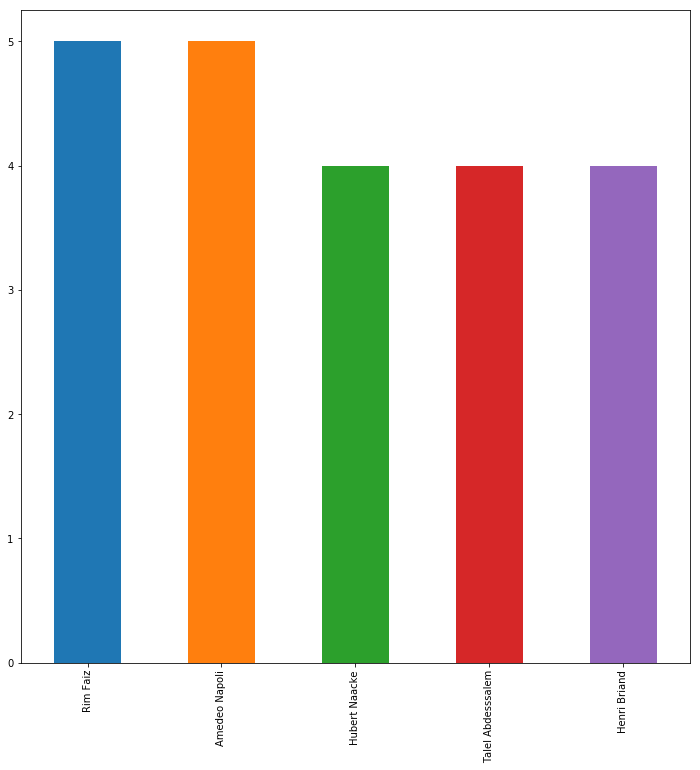

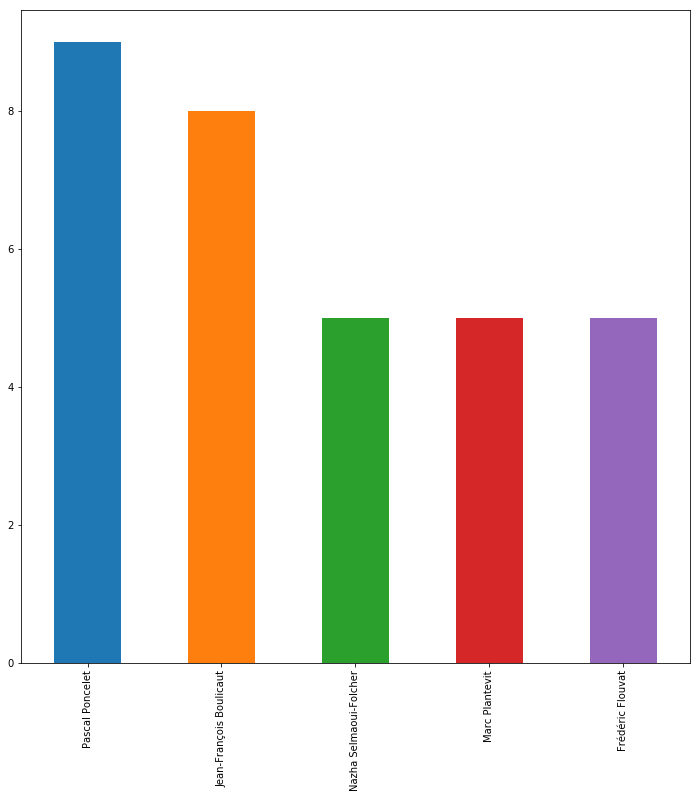

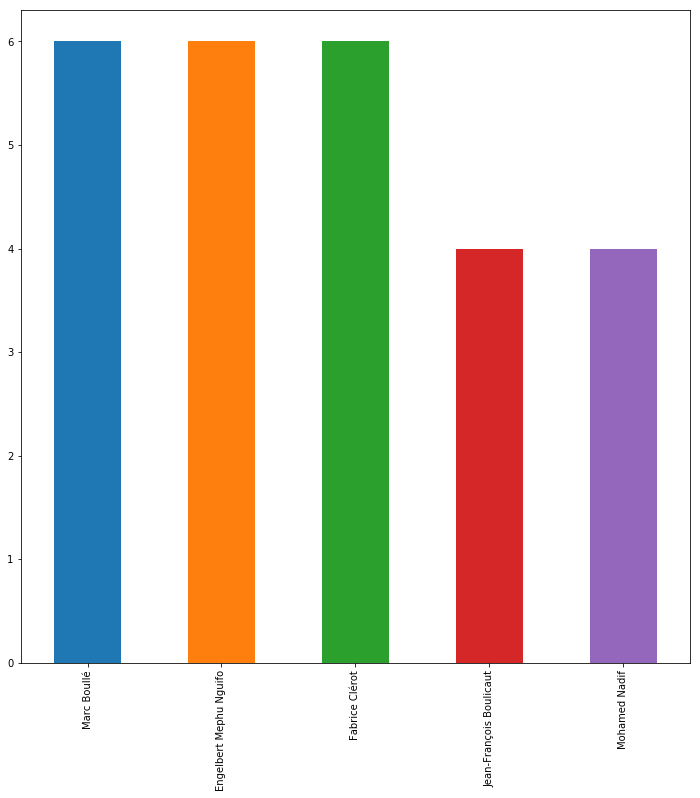

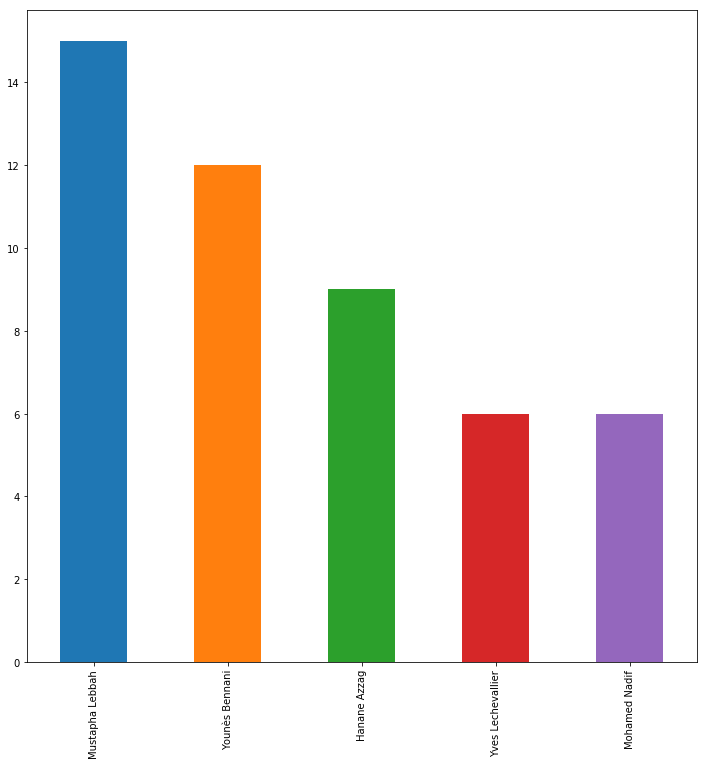

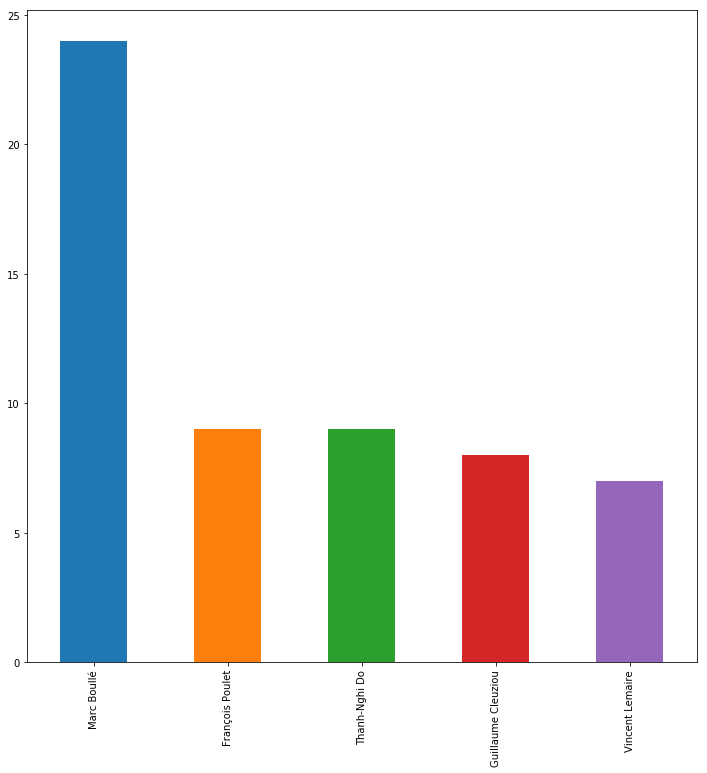

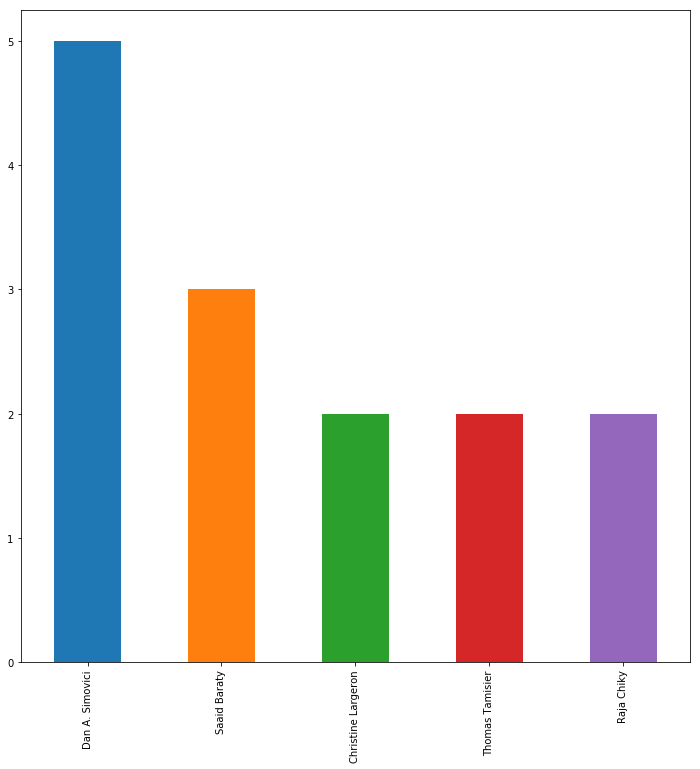

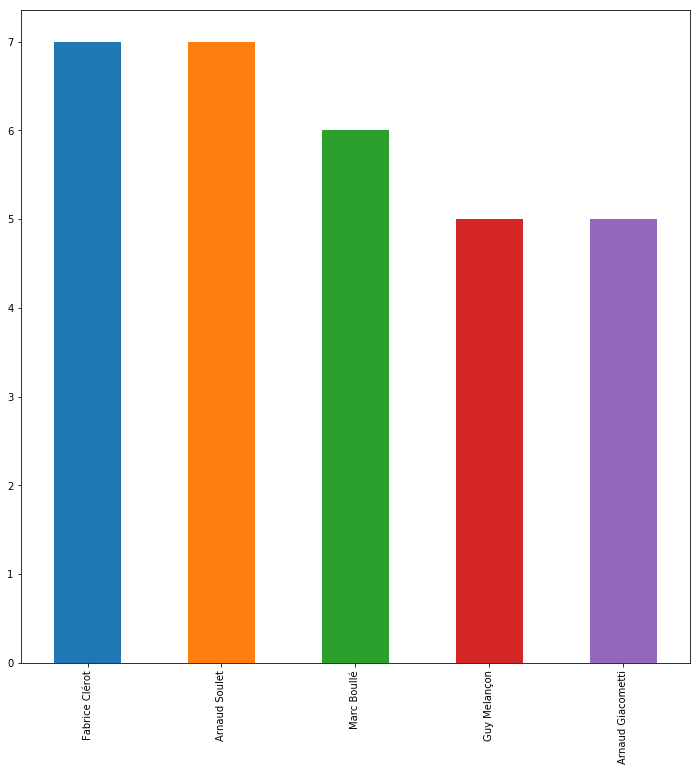

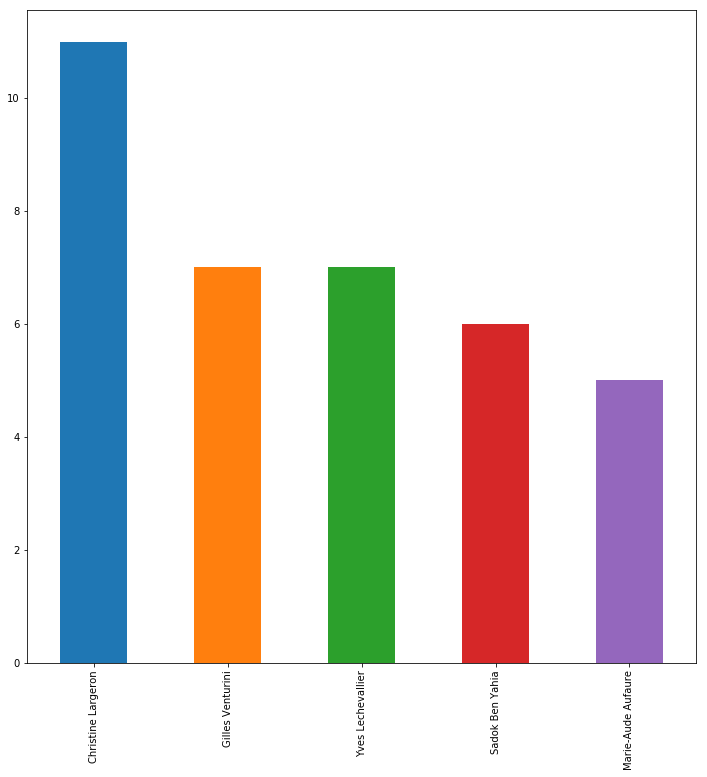

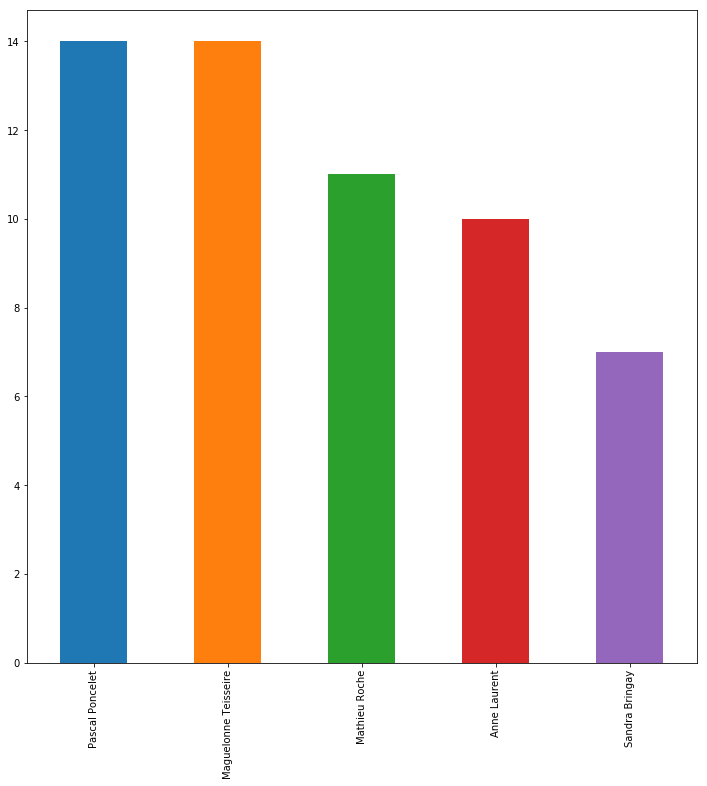

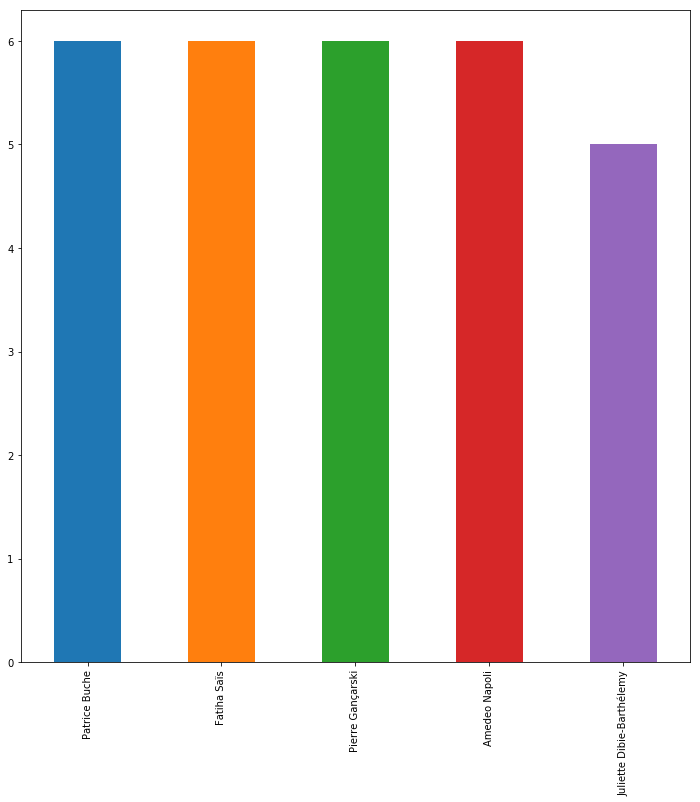

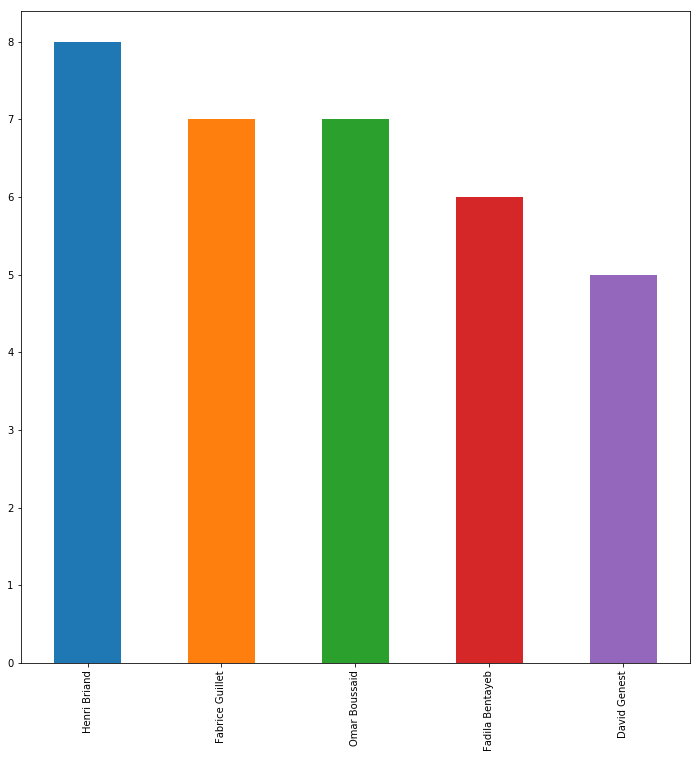

In [141]:
all_com_authors = []
for c in set(consensus_clustering_labels):
    plt.figure()
    index_doc_com = np.arange(len(consensus_clustering_labels))[consensus_clustering_labels==c]
    sub_mtd_authors = mtd_authors.iloc[index_doc_com, : ]
    com_vect_authors = np.sum(sub_mtd_authors, 0)
    all_com_authors.append(np.array(com_vect_authors))
    com_vect_sorted_author = com_vect_authors.sort_values(ascending=False)[:5].plot.bar(figsize=(12,12))